In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

#Step 1: Reading and Understanding the Data

In [2]:
df = pd.read_csv(r'/content/finalTrain - finalTrain.csv')


In [3]:
df.head(6)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,46.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,23.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,21.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,20.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,41.0
5,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,02-04-2022,20:25,20:35,Sandstorms,Jam,2.0,Buffet,electric_scooter,1.0,No,Metropolitian,20.0


In [4]:
df.tail(6)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
22356,0x5d41,BANGRES17DEL01,29.0,5.0,12.972532,77.608179,13.082532,77.718179,31-03-2022,0.75,18:10,Fog,Medium,0.0,Meal,motorcycle,1.0,Yes,Urban,44.0
22357,0xc4fb,KOLRES18DEL01,22.0,4.9,22.569367,88.433187,22.639367,88.503187,18-02-2022,17:30,17:45,Windy,Medium,0.0,Snack,motorcycle,1.0,No,Urban,26.0
22358,0x154e,BANGRES07DEL01,37.0,4.5,12.978453,77.643685,13.018453,77.683685,11-03-2022,14:10,14:15,Sunny,High,2.0,Meal,motorcycle,1.0,No,Metropolitian,23.0
22359,0xc412,ALHRES08DEL03,21.0,4.8,25.450329,81.834279,25.540329,81.924279,14-02-2022,21:25,21:40,Fog,Jam,0.0,Meal,motorcycle,2.0,No,Semi-Urban,48.0
22360,0x6861,INDORES18DEL01,28.0,4.6,22.753839,75.897429,22.763838,75.907429,09-03-2022,11:40,11:45,Stormy,High,0.0,Snack,motorcycle,1.0,No,Metropolitian,26.0
22361,0x1a6e,MYSRES05DEL02,30.0,4.6,12.323978,76.627961,12.373978,76.677961,05-04-2022,21:10,21:15,Sunny,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22362 entries, 0 to 22361
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           22362 non-null  object 
 1   Delivery_person_ID           22362 non-null  object 
 2   Delivery_person_Age          21516 non-null  float64
 3   Delivery_person_Ratings      21487 non-null  float64
 4   Restaurant_latitude          22362 non-null  float64
 5   Restaurant_longitude         22362 non-null  float64
 6   Delivery_location_latitude   22362 non-null  float64
 7   Delivery_location_longitude  22362 non-null  float64
 8   Order_Date                   22362 non-null  object 
 9   Time_Orderd                  21572 non-null  object 
 10  Time_Order_picked            22362 non-null  object 
 11  Weather_conditions           22072 non-null  object 
 12  Road_traffic_density         22078 non-null  object 
 13  Vehicle_conditio

In [6]:
df.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            846
Delivery_person_Ratings        875
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    790
Time_Order_picked                0
Weather_conditions             290
Road_traffic_density           284
Vehicle_condition                1
Type_of_order                    1
Type_of_vehicle                  1
multiple_deliveries            466
Festival                       107
City                           577
Time_taken (min)                 1
dtype: int64

In [8]:
###numerical misssing values

In [9]:
num_vars=df.select_dtypes(include=["int64","float64"]).columns

In [10]:
num_vars

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')

In [11]:
df[num_vars].isnull().sum()

Delivery_person_Age            846
Delivery_person_Ratings        875
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Vehicle_condition                1
multiple_deliveries            466
Time_taken (min)                 1
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')


imputer_mean = SimpleImputer(strategy='constant', fill_value=99)

In [14]:
imputer_mean.fit(df[num_vars])

SimpleImputer()

In [15]:
imputer_mean.statistics_

array([29.59578918,  4.63306651, 16.98572652, 70.31643301, 17.42726478,
       70.88692589,  1.02714548,  0.74666606, 26.32328608])

In [16]:
imputer_mean.transform(df[num_vars])

array([[36.        ,  4.2       , 30.327968  , ...,  2.        ,
         3.        , 46.        ],
       [21.        ,  4.7       , 10.003064  , ...,  1.        ,
         1.        , 23.        ],
       [23.        ,  4.7       , 18.56245   , ...,  1.        ,
         1.        , 21.        ],
       ...,
       [21.        ,  4.8       , 25.450329  , ...,  0.        ,
         2.        , 48.        ],
       [28.        ,  4.6       , 22.753839  , ...,  0.        ,
         1.        , 26.        ],
       [30.        ,  4.6       , 12.323978  , ...,  1.02714548,
         0.74666606, 26.32328608]])

In [17]:
df[num_vars] = imputer_mean.transform(df[num_vars])

In [18]:
df[num_vars].isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Vehicle_condition              0
multiple_deliveries            0
Time_taken (min)               0
dtype: int64

In [19]:
#Categorical Missing Value Imputation

In [20]:
cat_vars=df.select_dtypes(include=["O"]).columns
cat_vars

Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [21]:
df[cat_vars].isnull().sum()

ID                        0
Delivery_person_ID        0
Order_Date                0
Time_Orderd             790
Time_Order_picked         0
Weather_conditions      290
Road_traffic_density    284
Type_of_order             1
Type_of_vehicle           1
Festival                107
City                    577
dtype: int64

In [22]:
imputer_mode = SimpleImputer(strategy='most_frequent')
#imputer_mean = SimpleImputer(strategy='constant', fill_value=99)
imputer_mode

SimpleImputer(strategy='most_frequent')

In [23]:
imputer_mode.fit(df[cat_vars])

SimpleImputer(strategy='most_frequent')

In [24]:
imputer_mode.statistics_

array(['0x1000', 'COIMBRES02DEL01', '07-03-2022', '17:10', '21:30',
       'Stormy', 'Low', 'Snack', 'motorcycle', 'No', 'Metropolitian'],
      dtype=object)

In [25]:
df[cat_vars] = imputer_mode.transform(df[cat_vars])


In [26]:
df[cat_vars].isnull().sum()

ID                      0
Delivery_person_ID      0
Order_Date              0
Time_Orderd             0
Time_Order_picked       0
Weather_conditions      0
Road_traffic_density    0
Type_of_order           0
Type_of_vehicle         0
Festival                0
City                    0
dtype: int64

In [27]:
df.isnull().sum().sum()

0

In [28]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [29]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken (min)']
features1 =  ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']
for i in features:
    df[i] = df[i].astype(str).astype(float)
    for j in features1:
        df[j] = df[j].astype(str).astype(float)

In [30]:
df['Ordered_Time'] = df['Order_Date'] + str(' ') + df['Time_Orderd']
df['Picked_Time'] = df['Order_Date'] + str(' ') + df['Time_Order_picked']

In [31]:
# convert into datetime format
df['Ordered_Time']= pd.to_datetime(df['Ordered_Time'], errors='coerce', format='%d-%m-%Y %H:%M:%S')
df['Picked_Time']= pd.to_datetime(df['Picked_Time'], errors='coerce', format='%d-%m-%Y %H:%M:%S')

In [32]:
df['Time_Ordered_picked'] = ((df['Picked_Time'] - df['Ordered_Time'])/pd.Timedelta(1,'min')).fillna(0).astype(int)

In [33]:
df['Time_Ordered_picked'].value_counts()

0    22362
Name: Time_Ordered_picked, dtype: int64

In [34]:
pd.to_numeric(df['Time_Ordered_picked'], errors="ignore")

0        0
1        0
2        0
3        0
4        0
        ..
22357    0
22358    0
22359    0
22360    0
22361    0
Name: Time_Ordered_picked, Length: 22362, dtype: int64

In [35]:
df["Order_Date"] =pd.to_numeric(df["Order_Date"].str.replace(",", ""), errors='coerce')
df["Time_Orderd"]=pd.to_numeric(df["Time_Orderd"], errors='coerce')

In [36]:
ID = df.ID

In [37]:
df.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)

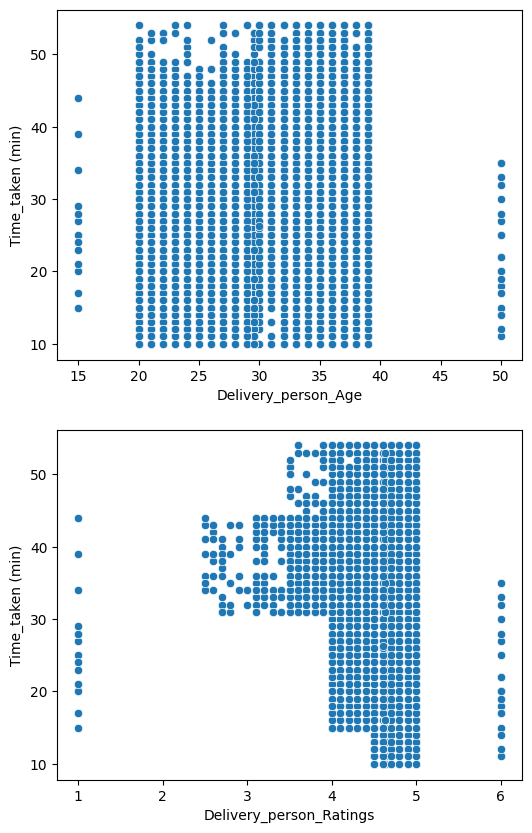

In [38]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,10), dpi=100)
sns.scatterplot(x='Delivery_person_Age', y='Time_taken (min)', data=df, ax=ax1)
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken (min)', data=df,ax=ax2)
plt.show()

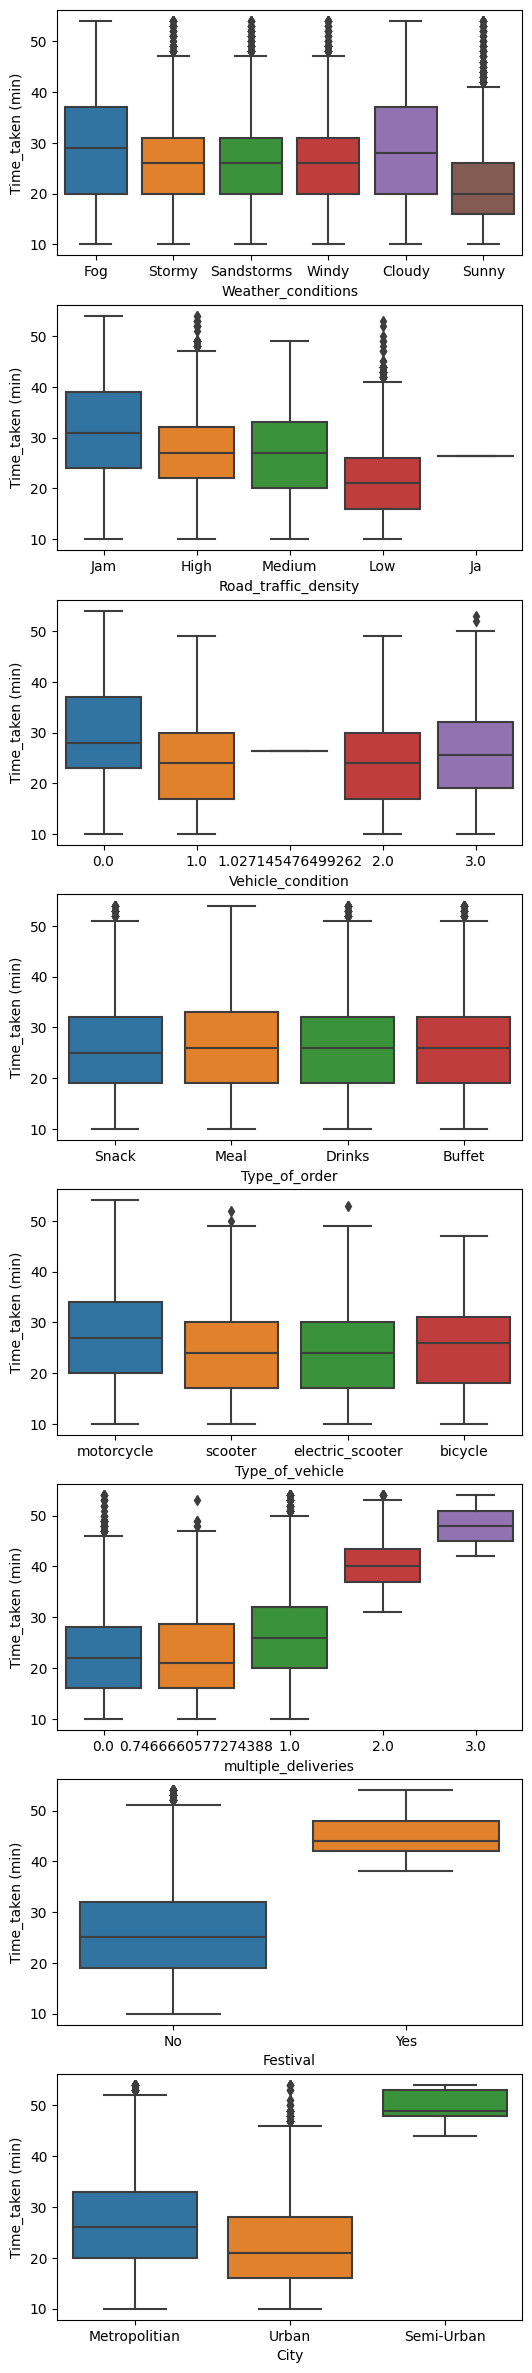

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize=(6,30), dpi=100)
sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df, ax=ax1)
sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df, ax=ax2)
sns.boxplot(x='Vehicle_condition', y='Time_taken (min)', data=df, ax=ax3)
sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=df, ax=ax4)
sns.boxplot(x='Type_of_vehicle', y='Time_taken (min)', data=df, ax=ax5)
sns.boxplot(x='multiple_deliveries', y='Time_taken (min)', data=df, ax=ax6)
sns.boxplot(x='Festival', y='Time_taken (min)', data=df, ax=ax7)
sns.boxplot(x='City', y='Time_taken (min)', data=df, ax=ax8)
plt.show()

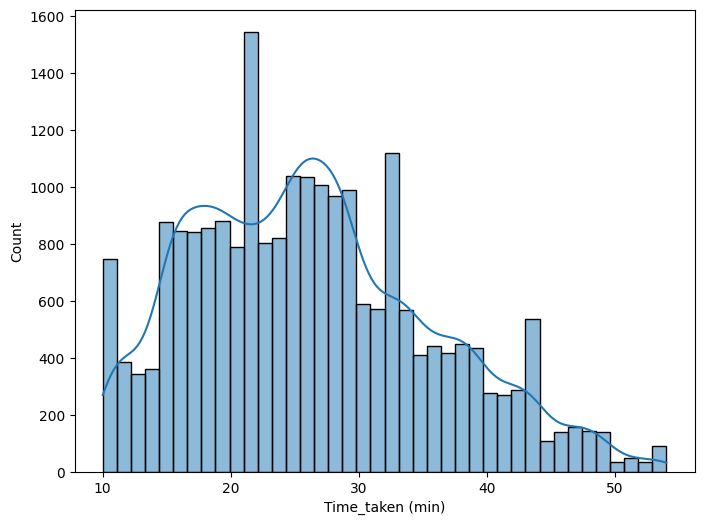

In [40]:
plt.figure(figsize=(8,6), dpi=100)
sns.histplot(df['Time_taken (min)'], bins=40, kde=True)
plt.show()

In [41]:
df=pd.get_dummies(df)

In [42]:
x = df['Time_taken (min)'].values.astype("float64")
y = df['Time_taken (min)'].values.astype("float64")

In [43]:
x=x.reshape(-1, 1)
y=y.reshape(-1,1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)

In [45]:
rf = RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=123).fit(x_train, y_train)
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.1,alpha=0.1,seed=123).fit(x_train, y_train)

<ipython-input-45-ba94fe0f7af5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=123).fit(x_train, y_train)


In [46]:
rf_pred = rf.predict(x_test)
xgb_pred = xgb.predict(x_test)

In [47]:
rf_pred = rf.predict(x_test)
xgb_pred = xgb.predict(x_test)


In [48]:
def rmse(pred, title):
    mse = metrics.mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    print('RMSE of '+ title +str(':'))
    print(np.round(rmse,3))

In [49]:
def r2(pred, title):
    r2 = metrics.r2_score(pred, y_test)
    print('R2 of ' + title + str(':'))
    print(r2)

In [50]:
def plot(pred, title):
    plt.figure(figsize=(10,8))
    plt.plot([i for i in range(len(y_test))], y_test, label='actual values')
    plt.plot([i for i in range(len(y_test))], pred, label='actual values')
    plt.title(title)
    plt.legend()
    plt.show()

In [51]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                         n_jobs=1, train_sizes=np.linspace(0.1,1,5)):
    plt.figure(figsize=(12,12))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('training examples')
    plt.ylabel('Score')

    train_sizes, train_score, test_score = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,                                                      train_sizes=train_sizes)
    train_score_mean = np.mean(train_score, 1)
    test_score_mean = np.mean(test_score, 1)
    train_score_std = np.std(train_score, 1)
    test_score_std = np.std(test_score, 1)
    plt.grid()

    plt.fill_between(train_sizes, train_score_mean-train_score_std,
                     train_score_mean+train_score_std, alpha=0.5, color='r')
    plt.fill_between(train_sizes, test_score_mean-test_score_std,
                     test_score_mean+test_score_std, alpha=0.5, color='g')
    plt.plot(train_sizes, train_score_mean, 'rs--', label='Training Score')
    plt.plot(train_sizes, test_score_mean, 'go-', label='Cross Validation Score')

    plt.legend(loc='lower right')
    plt.show()

In [52]:
rmse(rf_pred, 'RandomForestRegressor')

RMSE of RandomForestRegressor:
0.004


In [53]:
rmse(xgb_pred, 'XGBRegressor')

RMSE of XGBRegressor:
0.004


In [54]:
r2(rf_pred, 'RandomForestRegressor')

R2 of RandomForestRegressor:
0.9999998224239827


In [55]:
r2(xgb_pred, 'XGBRegressor')

R2 of XGBRegressor:
0.9999998221122185


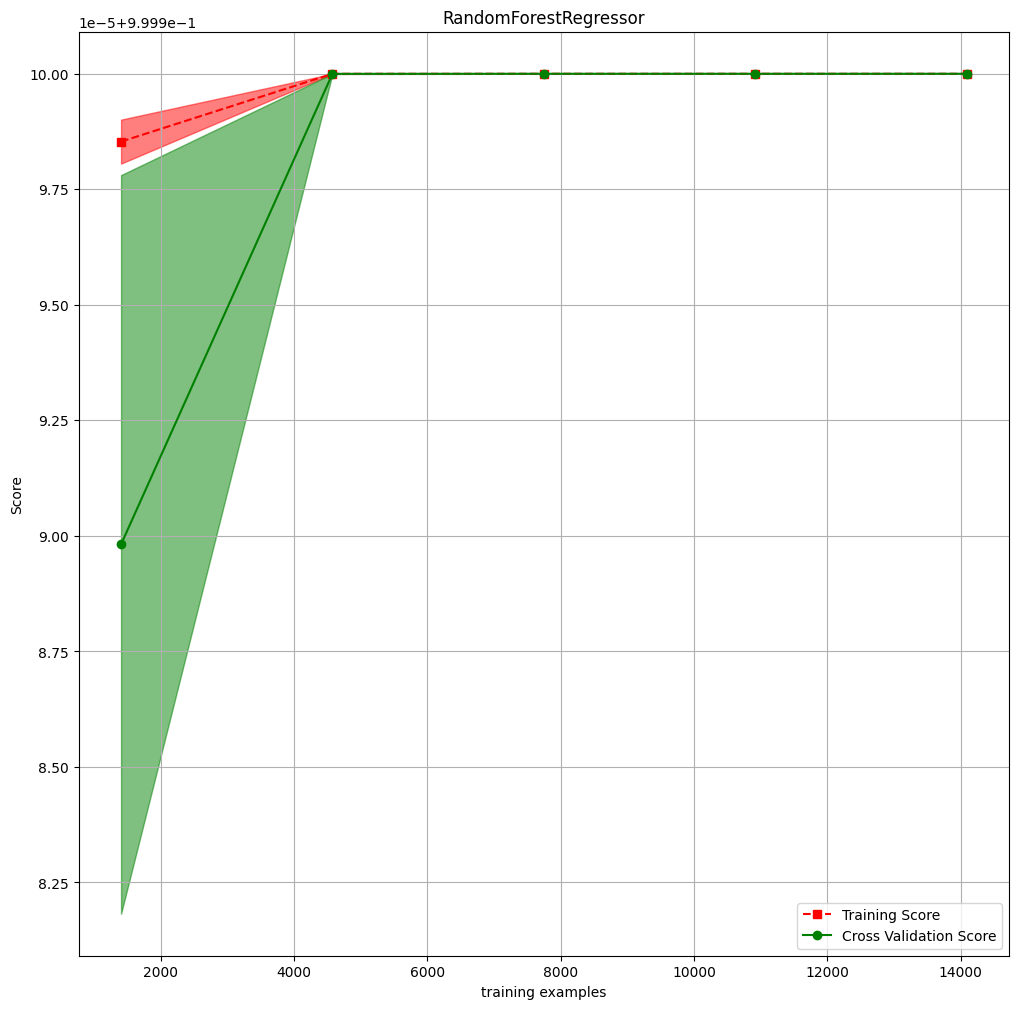

In [56]:
plot_learning_curve(rf, 'RandomForestRegressor', x_train, y_train, cv=10, n_jobs=-1)

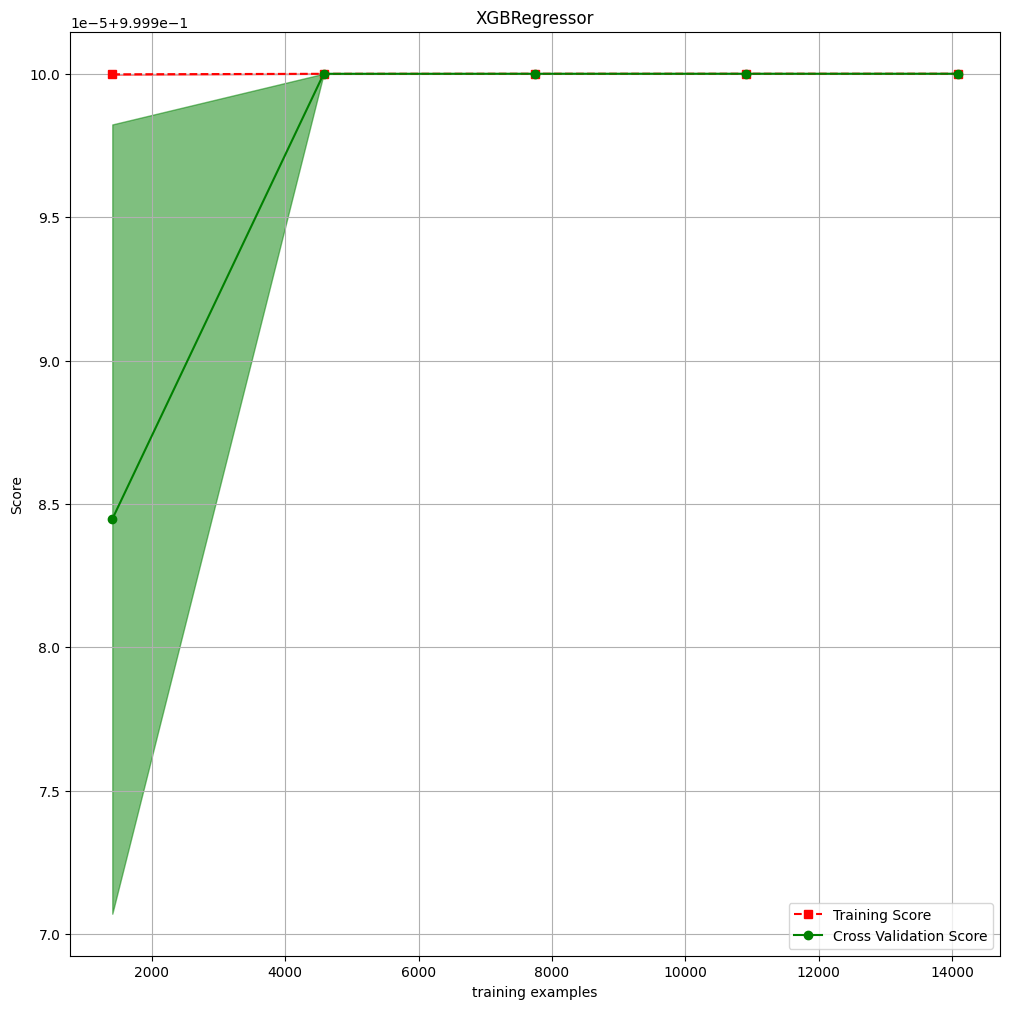

In [57]:
plot_learning_curve(xgb, 'XGBRegressor', x_train, y_train, cv=10, n_jobs=-1)

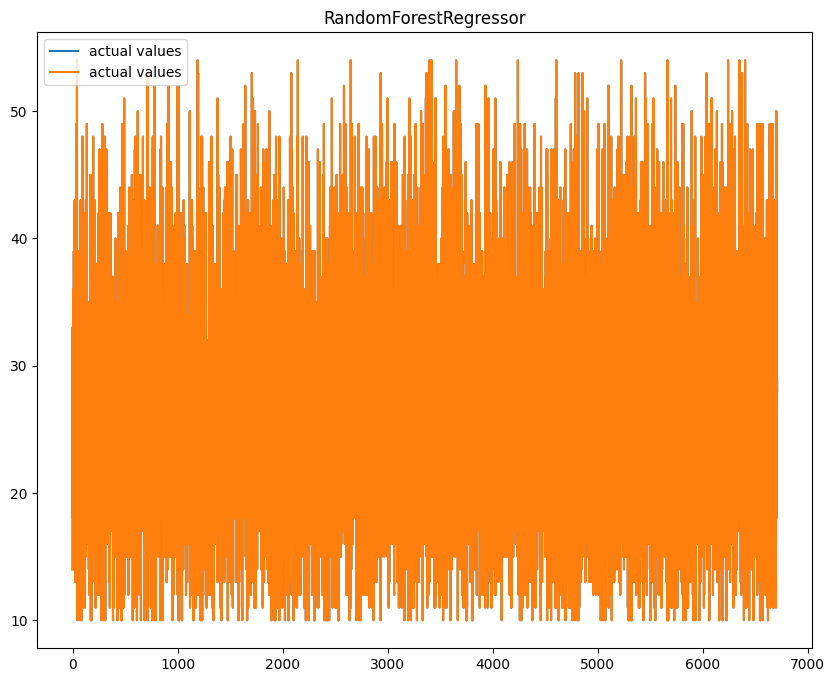

In [58]:
plot(rf_pred, 'RandomForestRegressor')

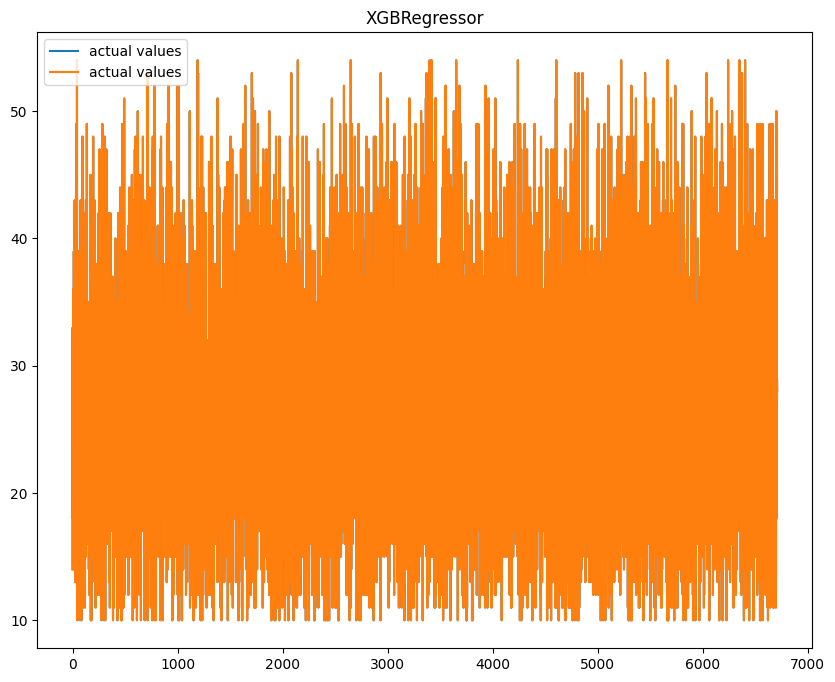

In [59]:
plot(xgb_pred, 'XGBRegressor')

In [60]:
pred_result = pd.DataFrame(y)
result = xgb.predict(pred_result)
result

array([45.99998 , 22.999987, 20.999994, ..., 47.99996 , 25.999992,
       25.999992], dtype=float32)

In [61]:
print(pd.DataFrame({'ID':ID, 'Time_taken':result}))

           ID  Time_taken
0      0xcdcd   45.999981
1      0xd987   22.999987
2      0x2784   20.999994
3      0xc8b6   20.000000
4      0xdb64   40.999985
...       ...         ...
22357  0xc4fb   25.999992
22358  0x154e   22.999987
22359  0xc412   47.999962
22360  0x6861   25.999992
22361  0x1a6e   25.999992

[22362 rows x 2 columns]
